In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,roc_curve, accuracy_score)


In [147]:
df = pd.read_csv(r'D:\Backup\Documents\Akka\python\Miniproject 2\chatgpt_style_reviews_dataset.xlsx - Sheet1.csv')

In [148]:
print('Rows:', len(df))
print('Columns:', len(df.columns))
df.head()

Rows: 50
Columns: 13


,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,Unnamed: 12
0,24-12-2024,East list local interesting far magazine father.,Impressive natural language understanding. Alm...,1,darren55,25,9,Google Play,de,Nepal,2.0.4,No,NaN
1,26-07-2024,Road determine picture figure hard experience ...,Sometimes gives wrong answers or outdated info...,2,davistyler,35,14,Flipkart,es,Panama,2.6.5,No,NaN
2,22-08-2024,Policy social past analysis whole.,Great tool for generating content quickly. Int...,5,andrea59,94,10,App Store,es,Denmark,4.2.2,No,NaN
3,24-04-2025,News financial billion four foreign.,Great tool for generating content quickly. Sta...,3,dcooper,50,15,Amazon,de,Brunei Darussalam,4.4.2,No,NaN
4,15-08-2024,To skill she case sing stop likely.,Excellent for language translation and grammar...,1,christine79,33,11,Flipkart,fr,United States Minor Outlying Islands,5.1.1,Yes,NaN


In [149]:
import nltk
import os
import re, string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Ensure nltk_data folder inside your project
NLTK_DIR = os.path.join(os.getcwd(), "nltk_data")
if not os.path.exists(NLTK_DIR):
    os.makedirs(NLTK_DIR)
nltk.data.path.append(NLTK_DIR)

# Helper: auto-download if missing
def ensure_nltk_resources():
    resources = ["punkt", "punkt_tab", "stopwords", "wordnet", "omw-1.4"]
    for res in resources:
        try:
            nltk.data.find(res)
        except LookupError:
            nltk.download(res, download_dir=NLTK_DIR)

# Ensure everything is available
ensure_nltk_resources()

# Load stopwords + lemmatizer
STOPWORDS = set(stopwords.words("english"))
LEMMATIZER = WordNetLemmatizer()



[nltk_data] Downloading package punkt to
[nltk_data]     d:\Backup\Documents\Akka\python\Miniproject
[nltk_data]     2\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     d:\Backup\Documents\Akka\python\Miniproject
[nltk_data]     2\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     d:\Backup\Documents\Akka\python\Miniproject
[nltk_data]     2\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     d:\Backup\Documents\Akka\python\Miniproject
[nltk_data]     2\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     d:\Backup\Documents\Akka\python\Miniproject
[nltk_data]     2\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [150]:
def clean_text(text: str) -> str:
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", " ", text)     # remove URLs
    text = re.sub(r"\d+", " ", text)                # remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))
    tokens = word_tokenize(text)                    # tokenization
    tokens = [LEMMATIZER.lemmatize(t) for t in tokens if t not in STOPWORDS]
    return " ".join(tokens)



In [151]:
df["cleaned_review"] = df["review"].apply(clean_text)
df.head()


,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,Unnamed: 12,cleaned_review
0,24-12-2024,East list local interesting far magazine father.,Impressive natural language understanding. Alm...,1,darren55,25,9,Google Play,de,Nepal,2.0.4,No,NaN,impressive natural language understanding almo...
1,26-07-2024,Road determine picture figure hard experience ...,Sometimes gives wrong answers or outdated info...,2,davistyler,35,14,Flipkart,es,Panama,2.6.5,No,NaN,sometimes give wrong answer outdated info stud...
2,22-08-2024,Policy social past analysis whole.,Great tool for generating content quickly. Int...,5,andrea59,94,10,App Store,es,Denmark,4.2.2,No,NaN,great tool generating content quickly interest...
3,24-04-2025,News financial billion four foreign.,Great tool for generating content quickly. Sta...,3,dcooper,50,15,Amazon,de,Brunei Darussalam,4.4.2,No,NaN,great tool generating content quickly start me...
4,15-08-2024,To skill she case sing stop likely.,Excellent for language translation and grammar...,1,christine79,33,11,Flipkart,fr,United States Minor Outlying Islands,5.1.1,Yes,NaN,excellent language translation grammar fix pri...


In [174]:
# Handle missing values
df = df.dropna(subset=["cleaned_review", "rating"])
df

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,Unnamed: 12,cleaned_review,sentiment,month
0,2024-12-24,East list local interesting far magazine father.,Impressive natural language understanding. Alm...,1,darren55,25,9,Google Play,de,Nepal,2.0.4,No,NaN,impressive natural language understanding almo...,Negative,2024-12-01
1,2024-07-26,Road determine picture figure hard experience ...,Sometimes gives wrong answers or outdated info...,2,davistyler,35,14,Flipkart,es,Panama,2.6.5,No,NaN,sometimes give wrong answer outdated info stud...,Negative,2024-07-01
2,2024-08-22,Policy social past analysis whole.,Great tool for generating content quickly. Int...,5,andrea59,94,10,App Store,es,Denmark,4.2.2,No,NaN,great tool generating content quickly interest...,Positive,2024-08-01
3,2025-04-24,News financial billion four foreign.,Great tool for generating content quickly. Sta...,3,dcooper,50,15,Amazon,de,Brunei Darussalam,4.4.2,No,NaN,great tool generating content quickly start me...,Neutral,2025-04-01
4,2024-08-15,To skill she case sing stop likely.,Excellent for language translation and grammar...,1,christine79,33,11,Flipkart,fr,United States Minor Outlying Islands,5.1.1,Yes,NaN,excellent language translation grammar fix pri...,Negative,2024-08-01
5,2024-07-04,Involve office space crime.,Explains complex topics clearly and simply. De...,4,qfields,29,12,Flipkart,fr,Spain,2.1.5,Yes,NaN,explains complex topic clearly simply detail v...,Positive,2024-07-01
6,2024-08-13,American wait board improve there court TV.,Excellent for language translation and grammar...,2,david89,45,10,App Store,en,Kuwait,3.2.7,No,NaN,excellent language translation grammar fix fun...,Negative,2024-08-01
7,2025-02-22,Control drop economic easy ability become figure.,Sometimes gives wrong answers or outdated info...,3,mark52,77,12,App Store,en,Antigua and Barbuda,5.7.2,No,NaN,sometimes give wrong answer outdated info catc...,Neutral,2025-02-01
8,2024-12-12,Pick rock body stuff off model brother.,Sometimes gives wrong answers or outdated info...,1,glewis,66,13,Google Play,de,Hong Kong,5.7.8,Yes,NaN,sometimes give wrong answer outdated info else...,Negative,2024-12-01
9,2025-02-23,School involve teach rather long value director.,Very helpful for coding and debugging tasks. S...,2,davispatricia,33,19,App Store,en,Brunei Darussalam,4.0.6,No,NaN,helpful coding debugging task tax much hard th...,Negative,2025-02-01


In [175]:
# Download cleaned df
df.to_csv("cleaned_reviews.csv", index=False)

In [153]:
# Creating sentiment labels from ratings
def label_sentiment(rating):
    if rating <= 2:
        return "Negative"
    elif rating == 3:
        return "Neutral"
    else:
        return "Positive"

df["sentiment"] = df["rating"].apply(label_sentiment)

print(df["sentiment"].value_counts())


sentiment
Negative    20
Positive    17
Neutral     13
Name: count, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_19748\3846923107.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




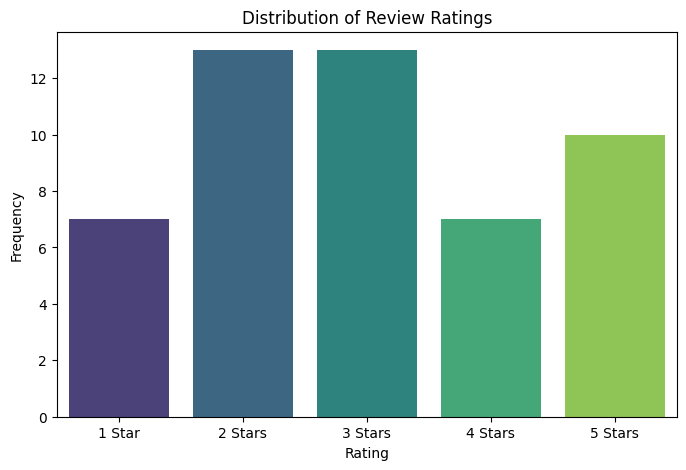

In [154]:
# EDA
#  1. What is the distribution of review ratings?
# Visualization: Bar chart (1 to 5 stars)
# Insight: Understand overall sentiment — are users mostly happy or frustrated?
plt.figure(figsize=(8, 5))
sns.countplot(x="rating", data=df, palette="viridis")
plt.title("Distribution of Review Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.xticks(ticks=range(5), labels=["1 Star", "2 Stars", "3 Stars", "4 Stars", "5 Stars"])
plt.show()

# Observations
# Ratings 1 Star and 5 Stars are underrepresented.
# Majority of reviews are 4 Stars, indicating general satisfaction.
# Ratings 2 Stars and 3 Stars are more common, suggesting mixed feelings.

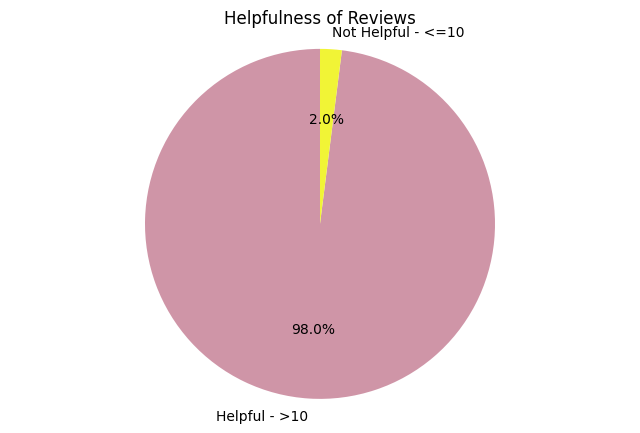

Helpful Reviews (>10 votes): 49
Not Helpful Reviews (<=10 votes): 1


In [155]:
# 2. 👍👎 2. How many reviews were marked as helpful (above a certain threshold)? using pie chart
# Visualization: Thumbs up/down count or pie chart
# Insight: See how much value users find in reviews, e.g., reviews with more than 10 helpful votes

helpful_counts = df[df["helpful_votes"] > 10]["helpful_votes"].count()
not_helpful_counts = df[df["helpful_votes"] <= 10]["helpful_votes"].count()

plt.figure(figsize=(8, 5))
plt.pie([helpful_counts, not_helpful_counts], labels=["Helpful - >10", "Not Helpful - <=10"], autopct="%1.1f%%", startangle=90, colors=["#AF4C6B97", "#F1F436"])
plt.title("Helpfulness of Reviews")
plt.axis("equal")
plt.show()
print("Helpful Reviews (>10 votes):", helpful_counts)
print("Not Helpful Reviews (<=10 votes):", not_helpful_counts)



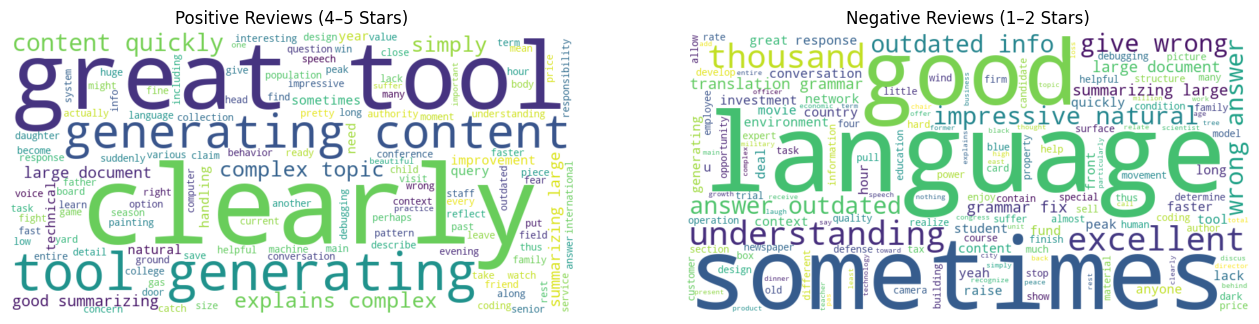

In [156]:
# 🧭 3. What are the most common keywords in positive vs. negative reviews?
# Visualization: Two Word Clouds (one for 4–5 stars, one for 1–2 stars)
# Insight: Discover what users love or complain about.
from wordcloud import WordCloud
# Split positive & negative
pos_reviews = df[df["rating"] >= 4]["cleaned_review"]
neg_reviews = df[df["rating"] <= 2]["cleaned_review"]

# Combine text
pos_text = " ".join(pos_reviews.astype(str))
neg_text = " ".join(neg_reviews.astype(str))

# Generate word clouds
wc_pos = WordCloud(width=800, height=400, background_color="white").generate(pos_text)
wc_neg = WordCloud(width=800, height=400, background_color="white").generate(neg_text)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].imshow(wc_pos, interpolation="bilinear")
axes[0].set_title("Positive Reviews (4–5 Stars)")
axes[0].axis("off")

axes[1].imshow(wc_neg, interpolation="bilinear")
axes[1].set_title("Negative Reviews (1–2 Stars)")
axes[1].axis("off")

plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_19748\3370174444.py:5: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

d:\Backup\Documents\Akka\python\Miniproject 2\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.



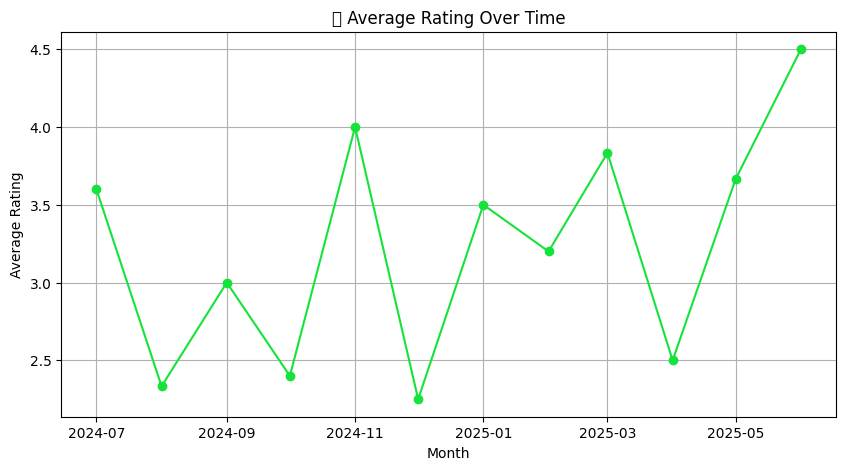

In [157]:
# 📆 4. How has the average rating changed over time?
# Visualization: Line chart with date on x-axis, average rating on y-axis
# Insight: Track user satisfaction over weeks/month
# Ensure 'date' is in datetime format
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Group by month (or week if you prefer finer detail)
df["month"] = df["date"].dt.to_period("M").dt.to_timestamp()

# Compute average rating per month
trend = df.groupby("month")["rating"].mean().reset_index()

# Plot
plt.figure(figsize=(10,5))
plt.plot(trend["month"], trend["rating"], marker="o" , color="#15E33B")
plt.title("📆 Average Rating Over Time")
plt.xlabel("Month")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_19748\80466642.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


d:\Backup\Documents\Akka\python\Miniproject 2\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.



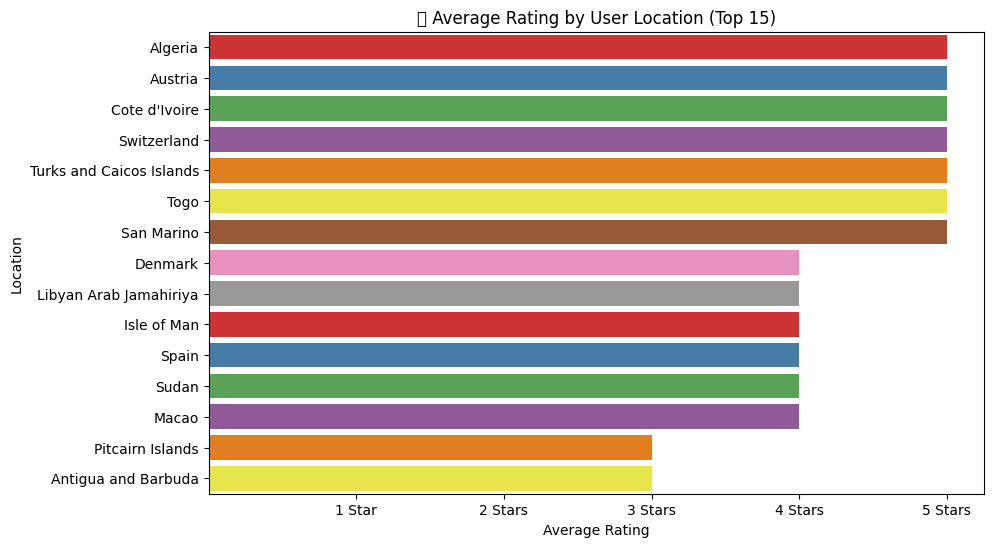

In [158]:
# 🌍 5. How do ratings vary by user location?
# Visualization: Bar chart or world map
# Insight: Identify regional differences in satisfaction or experience.
# Average rating by location
location_avg = df.groupby("location")["rating"].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=location_avg.values, y=location_avg.index, palette="Set1")
plt.title("🌍 Average Rating by User Location (Top 15)")
plt.xticks(ticks=np.arange(1, 6), labels=["1 Star", "2 Stars", "3 Stars", "4 Stars", "5 Stars"])
plt.xlabel("Average Rating")
plt.ylabel("Location")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_19748\2348571772.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


d:\Backup\Documents\Akka\python\Miniproject 2\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 129489 (\N{ADULT}) missing from font(s) DejaVu Sans.

d:\Backup\Documents\Akka\python\Miniproject 2\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128187 (\N{PERSONAL COMPUTER}) missing from font(s) DejaVu Sans.



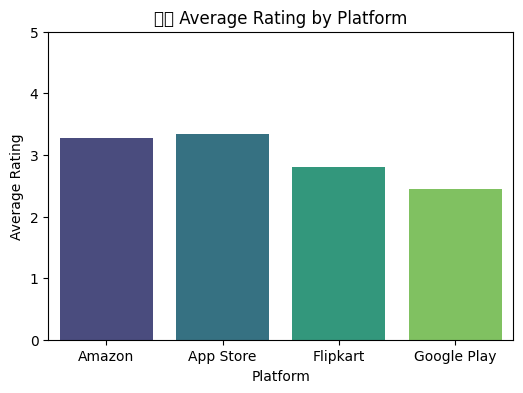

In [159]:
# 🧑‍💻 6. Which platform (Web vs Mobile) gets better reviews?
# Visualization: Grouped bar chart comparing average ratings by platform
# Insight: Helps product teams focus improvements.

# Average rating by platform
platform_avg = df.groupby("platform")["rating"].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x="platform", y="rating", data=platform_avg, palette="viridis")
plt.title("🧑‍💻 Average Rating by Platform")
plt.xlabel("Platform")
plt.ylabel("Average Rating")
plt.ylim(0, 5)  # ratings are on a 1–5 scale
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_19748\1628064746.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


d:\Backup\Documents\Akka\python\Miniproject 2\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.

d:\Backup\Documents\Akka\python\Miniproject 2\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.



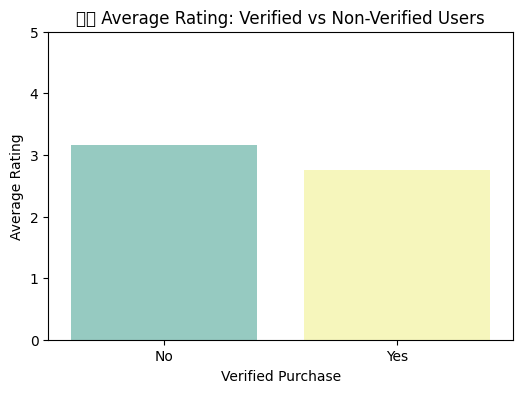

d:\Backup\Documents\Akka\python\Miniproject 2\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.

d:\Backup\Documents\Akka\python\Miniproject 2\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.



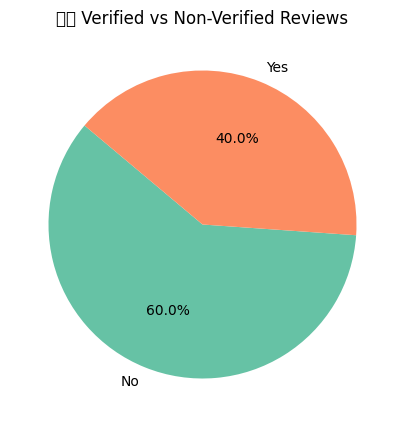

In [160]:
# ✅❌ 7. Are verified users more satisfied than non-verified ones?
# Visualization: Pie chart or side-by-side bar chart comparing rating averages
# Insight: Indicates whether loyal/paying users are happier.
# Average rating by verified purchase
verified_avg = df.groupby("verified_purchase")["rating"].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x="verified_purchase", y="rating", data=verified_avg, palette="Set3")
plt.title("✅❌ Average Rating: Verified vs Non-Verified Users")
plt.xlabel("Verified Purchase")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.show()

verified_counts = df["verified_purchase"].value_counts()

plt.figure(figsize=(5,5))
plt.pie(
    verified_counts,
    labels=verified_counts.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=["#66c2a5", "#fc8d62"]
)
plt.title("✅❌ Verified vs Non-Verified Reviews")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_19748\3933961160.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


d:\Backup\Documents\Akka\python\Miniproject 2\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128288 (\N{INPUT SYMBOL FOR LATIN CAPITAL LETTERS}) missing from font(s) DejaVu Sans.



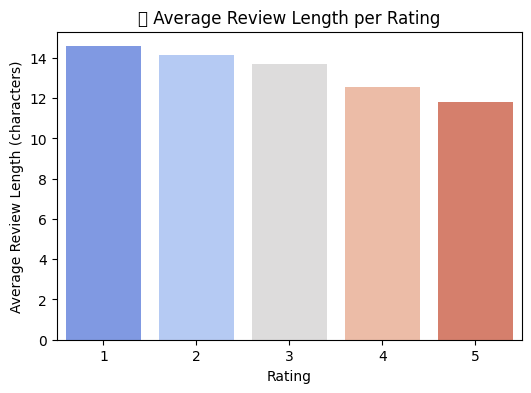

In [161]:
# 🔠 8. What’s the average length of reviews per rating category?
# Visualization: Box plot or bar chart
# Insight: Shows whether people write longer reviews when they're unhappy or very happy.

# Compute average review length per rating using bar chart
length_avg = df.groupby("rating")["review_length"].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x="rating", y="review_length", data=length_avg, palette="coolwarm")
plt.title("🔠 Average Review Length per Rating")
plt.xlabel("Rating")
plt.ylabel("Average Review Length (characters)")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_19748\2230027587.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


d:\Backup\Documents\Akka\python\Miniproject 2\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128288 (\N{INPUT SYMBOL FOR LATIN CAPITAL LETTERS}) missing from font(s) DejaVu Sans.



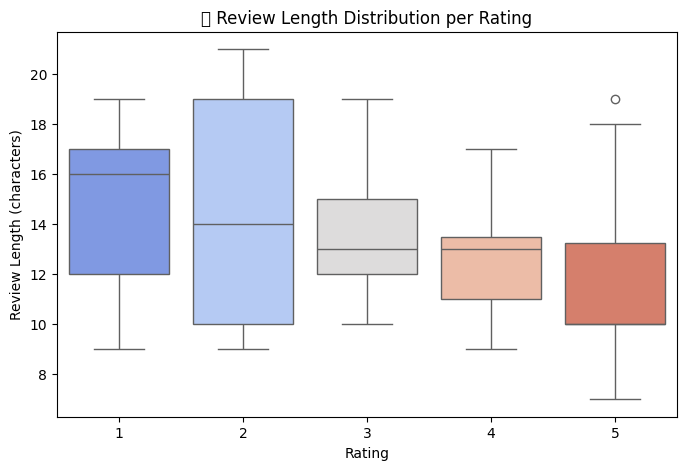

In [162]:
# (Box Plot — for spread & outliers)
plt.figure(figsize=(8,5))
sns.boxplot(x="rating", y="review_length", data=df, palette="coolwarm")
plt.title("🔠 Review Length Distribution per Rating")
plt.xlabel("Rating")
plt.ylabel("Review Length (characters)")
plt.show()


d:\Backup\Documents\Akka\python\Miniproject 2\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.



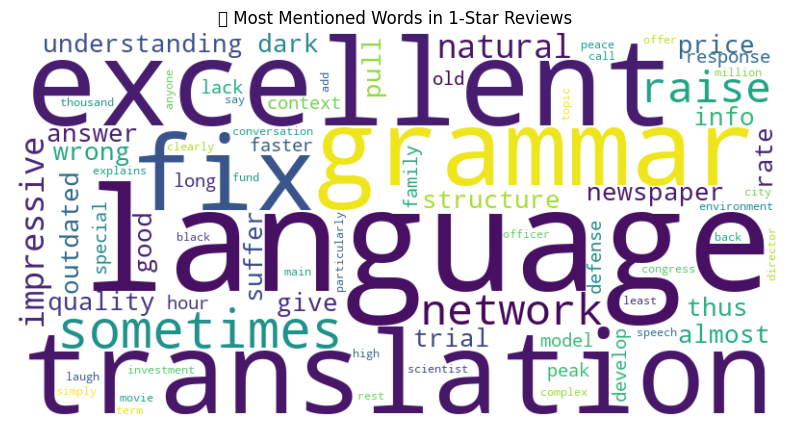

In [163]:
# 💬 9. What are the most mentioned words in 1-star reviews?
# Visualization: Word cloud or bar chart of top terms
# Insight: Spot recurring issues or complaints.
# (Word Cloud)
from wordcloud import WordCloud

# Filter 1-star reviews
one_star = df[df["rating"] == 1]["cleaned_review"]

# Combine into one text
one_text = " ".join(one_star.astype(str))

# Generate word cloud
wc = WordCloud(width=800, height=400, background_color="white").generate(one_text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("💬 Most Mentioned Words in 1-Star Reviews")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_19748\1171555579.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


d:\Backup\Documents\Akka\python\Miniproject 2\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.



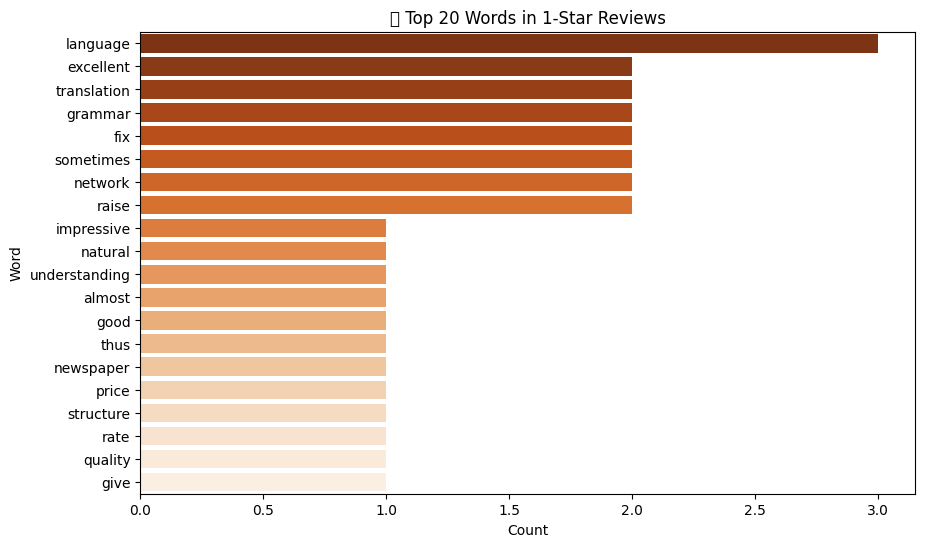

In [164]:
# (Bar Chart – Top 20 Words)
from collections import Counter

# Tokenize all 1-star reviews
one_tokens = " ".join(one_star.astype(str)).split()
word_freq = Counter(one_tokens).most_common(20)

# Convert to DataFrame for plotting
words, counts = zip(*word_freq)

plt.figure(figsize=(10,6))
sns.barplot(x=list(counts), y=list(words), palette="Oranges_r")
plt.title("💬 Top 20 Words in 1-Star Reviews")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_19748\4161327450.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


d:\Backup\Documents\Akka\python\Miniproject 2\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) DejaVu Sans.

d:\Backup\Documents\Akka\python\Miniproject 2\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.



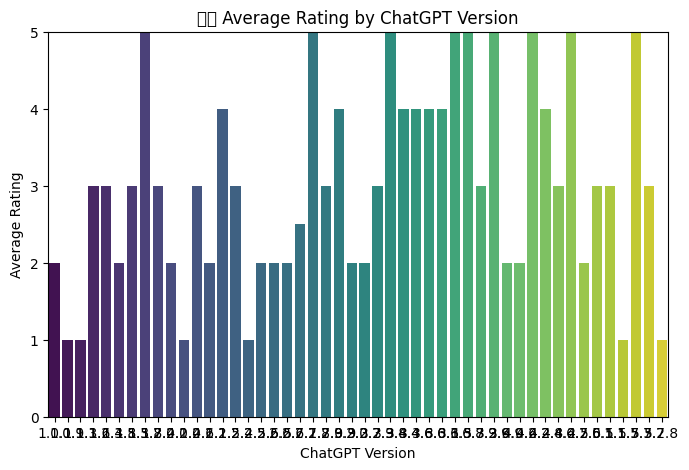

In [165]:
# 📱🧪 10. What ChatGPT version received the highest average rating?
# Visualization: Bar chart (version vs. average rating)
# Insight: Evaluate improvement or regression across updates.
# Average rating by ChatGPT version
version_avg = df.groupby("version")["rating"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x="version", y="rating", data=version_avg, palette="viridis")
plt.title("📱🧪 Average Rating by ChatGPT Version")
plt.xlabel("ChatGPT Version")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_19748\1434186873.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




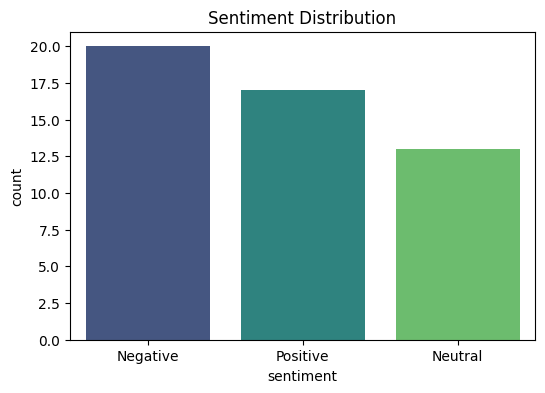

In [166]:
# Sentiment distribution
import warnings
ignore_warnings = True
plt.figure(figsize=(6,4))
sns.countplot(x="sentiment", data=df, palette="viridis")
plt.title("Sentiment Distribution")
plt.show()

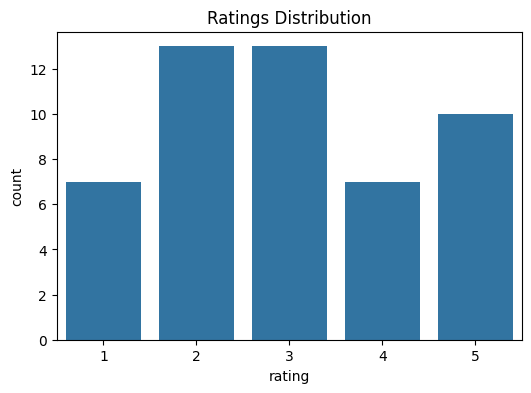

In [167]:
# Ratings distribution
plt.figure(figsize=(6,4))
sns.countplot(x="rating", data=df)
plt.title("Ratings Distribution")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_19748\124511174.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




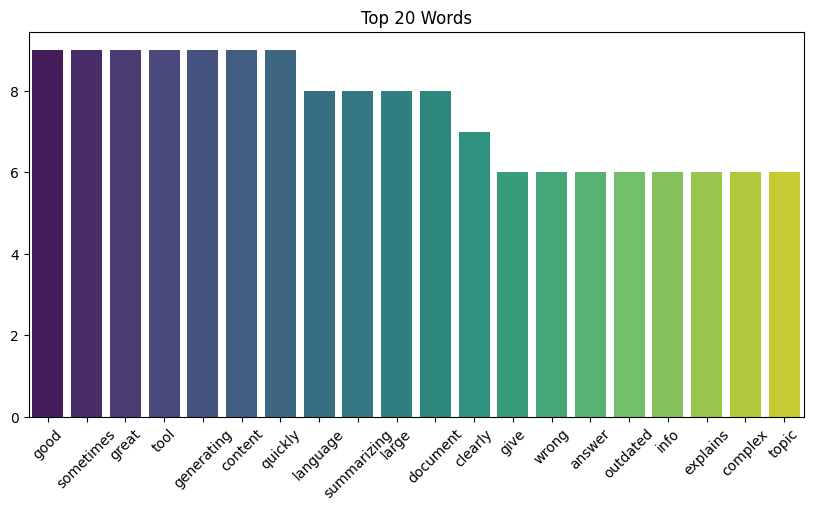

In [168]:
# Word frequency
all_words = " ".join(df["cleaned_review"]).split()
word_freq = Counter(all_words).most_common(20)
words, counts = zip(*word_freq)
plt.figure(figsize=(10,5))
sns.barplot(x=list(words), y=list(counts), palette="viridis")
plt.title("Top 20 Words")
plt.xticks(rotation=45)
plt.show()

In [169]:
# Model Training
# Train-test Split
X = df["cleaned_review"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [170]:
# Vectorization (TF-IDF)
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [171]:
# Model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

In [172]:
# Training & Evaluation
for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

    # ROC-AUC only for binary classification
    if len(set(y)) == 2:
        y_proba = model.predict_proba(X_test_vec)[:,1]
        auc = roc_auc_score(y_test, y_proba)
        print("ROC AUC:", auc)
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

if len(set(y)) == 2:
    plt.plot([0,1],[0,1],'--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves")
    plt.legend()
    plt.show()



===== Logistic Regression =====
              precision    recall  f1-score   support

    Negative       0.43      0.75      0.55         4
     Neutral       0.00      0.00      0.00         3
    Positive       0.00      0.00      0.00         3

    accuracy                           0.30        10
   macro avg       0.14      0.25      0.18        10
weighted avg       0.17      0.30      0.22        10

Confusion Matrix:
 [[3 0 1]
 [1 0 2]
 [3 0 0]]
Accuracy: 0.3

===== Naive Bayes =====
              precision    recall  f1-score   support

    Negative       0.43      0.75      0.55         4
     Neutral       0.00      0.00      0.00         3
    Positive       0.00      0.00      0.00         3

    accuracy                           0.30        10
   macro avg       0.14      0.25      0.18        10
weighted avg       0.17      0.30      0.22        10

Confusion Matrix:
 [[3 0 1]
 [1 0 2]
 [3 0 0]]
Accuracy: 0.3

===== Random Forest =====


d:\Backup\Documents\Akka\python\Miniproject 2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\Backup\Documents\Akka\python\Miniproject 2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\Backup\Documents\Akka\python\Miniproject 2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\Backup\Documents\Akka\python\Miniproject 2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being s

              precision    recall  f1-score   support

    Negative       0.33      0.25      0.29         4
     Neutral       0.00      0.00      0.00         3
    Positive       0.29      0.67      0.40         3

    accuracy                           0.30        10
   macro avg       0.21      0.31      0.23        10
weighted avg       0.22      0.30      0.23        10

Confusion Matrix:
 [[1 0 3]
 [1 0 2]
 [1 0 2]]
Accuracy: 0.3


d:\Backup\Documents\Akka\python\Miniproject 2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\Backup\Documents\Akka\python\Miniproject 2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\Backup\Documents\Akka\python\Miniproject 2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

